In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'August 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16
2018-03-31     2568   1997         51    6   0    10     79     197      12
2018-04-30     2359   2410         74    5   0     1     56     129       9
2018-05-31     2166   2355         65    4   0     1     42     131      12
2018-06-30     2361   2369         32    3   0     7     64     150      17
2018-07-31     2435   2513         69    1   0     7     51     184       7
2018-08-31     2637   2437         59    1   0     5    115     161       9

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-08-31      202    -76        -10   0   0    -2     64     -23       2

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

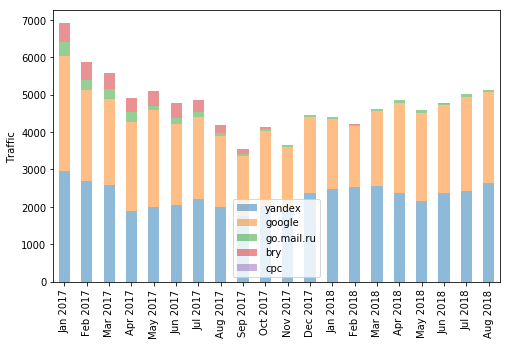

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

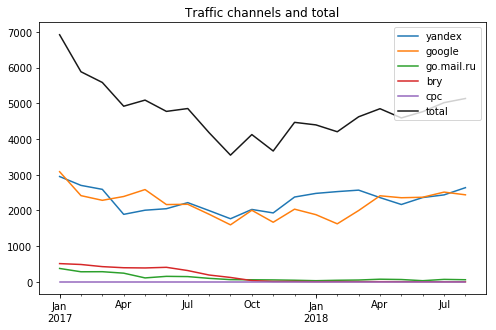

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
go.mail.ru 0                                             (not set)     59
google     0                                         дешевые двери    285
           1                                          двери дешево    251
           2                                       двери из дерева    239
           3                             np - /?cnt=catalog&r=2438     99
           4                             np - /?cnt=catalog&r=1428     90
           5                                      np - /?pid=pokaz     63
           6                                         двери продажа     58
           7                                                np - /     53
           8                                дверное полотно дешево     25
           9                                  np - /?pid=pricelist     21
           10                              np - /?pid=menu-katalog      8
           11                             np - /?cnt=catalog&r=473      7
           12                                   np - /?pid=contact      7
           13                               дверные полотна купить      7
           14                            np - /?cnt=catalog&r=1694      6
           15                                    полотно для двери      6
           16                                        двери полотно      5
           17                                      полотна дверные      5
           18                                        полотно двери      5
           19                            np - /?cnt=catalog&r=4230      4
           20                                      дверное полотно      4
           21                            np - /?cnt=catalog&r=2546      3
           22                            np - /?cnt=catalog&r=2966      3
           23                            np - /?cnt=catalog&r=3124      3
           24                                       двери в ванную      3
           25                                      полотно дверное      3
           26                            np - /?cnt=catalog&r=1203      2
           27                             np - /?cnt=catalog&r=156      2
           28                            np - /?cnt=catalog&r=2262      2
...                                                            ...    ...
yandex     2447  ниже приведены стандартные размеры дверного по...      1
           2448                   нужна ли дверь на кухню или арка      1
           2449  нужна ли дверь на кухню с газовой плитой в ква...      1
           2450                   облицовка дверного проема купить      1
           2451  обрамление дверных проемов из дерева и шпона к...      1
           2452  олови дверное полотно ответная часть со стекло...      1
           2453  олови дверное полотно со стеклом миланский оре...      1
           2454            оригинальные дверные аксессуары отлично      1
           2455  особенности оформления дверного полотна в разн...      1
           2456                      отрегулировать двери на кухне      1
           2457                             отходит эмаль на двери      1
           2458                    отходит эмаль на двери волховец      1
           2459              п44т со сдвижной дверью на кухню фото      1
           2460        петли для внутренних радиусных дверей кухни      1
           2461                    петли для откидных дверей кухни      1
           2462  петли для откидных дверей кухни приобрести выс...      1
           2463                          подписка дверного полотна      1
           2464  подставка упор для двери подставка для дверног...      1
           2465  полотна дверные глухие хвоя+ купить в новосиби...      1
           2466                             полотно двери 1900х800      1
           2467                                 полотно двери 2005      1
           2468  полотно двери 800х2000+ купить в красноярске с...      1
           2469                                  полотно двери 

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
go.mail.ru,(not set),59
google,дешевые двери,285
yahoo,np - /?cnt=catalog&r=1428,1
yandex,(not set),90


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
go.mail.ru 0                                           (not set)     59
google     0                                       дешевые двери    285
           1                                        двери дешево    251
           2                                     двери из дерева    239
           3                           np - /?cnt=catalog&r=2438     99
           4                           np - /?cnt=catalog&r=1428     90
yahoo      0                           np - /?cnt=catalog&r=1428      1
           1                           np - /?cnt=catalog&r=2438      1
yandex     0                                           (not set)     90
           10                              дверное полотно ницца      3
           7   купить дверное полотно без коробки 50 на 200 ц...      3
           5                         купить арку в дверной проем      3
           6                                     дверь для кухни      3